# Importing Libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [99]:
df=pd.read_csv('hotel_bookings 2.csv') #reading libraries

In [100]:
df.head(6)

#to see the top 5

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [101]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'],format="%d/%m/%Y") # We want to RSD to Date format so we can work on it 

In [102]:
df.describe(include='object') # Just for the Observing the data 

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [103]:
df.isna().sum() #Looking for Null Values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [104]:
df.drop(['company','agent'],axis=1,inplace=True)
 # We dont want these two columns as they don't add any value to this analysis

In [105]:
df.dropna(inplace=True) #from this we drop the null values

In [106]:
df.isna().sum() #lets check it again

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df['adr'] # Average Daily Rate

<Axes: >

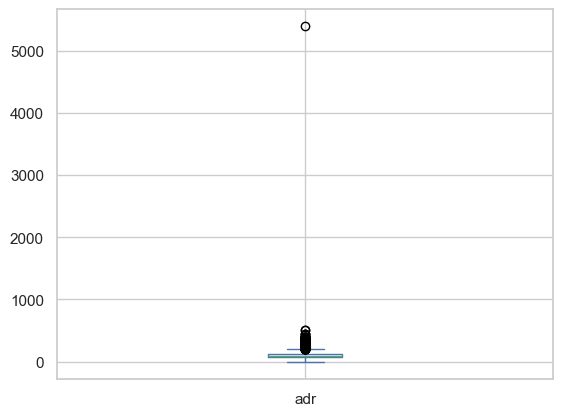

In [66]:
df['adr'].plot(kind='box') 

In [86]:
cancel=df['is_canceled'].value_counts(normalize=True)
print(cancel)
print('*'*10) 
print(df['is_canceled'].value_counts())

is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64
**********
is_canceled
0    74745
1    44153
Name: count, dtype: int64


is_canceled
0    74745
1    44153
Name: count, dtype: int64


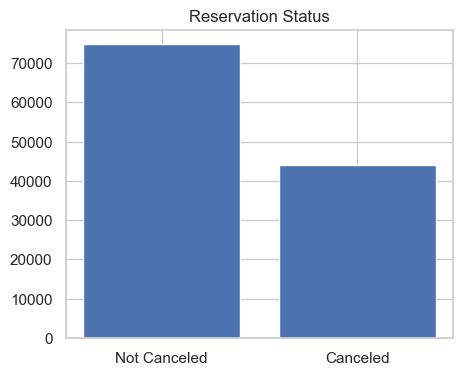

In [68]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts())
print(df['is_canceled'].value_counts())

- About 7800 people don't cancel it and 

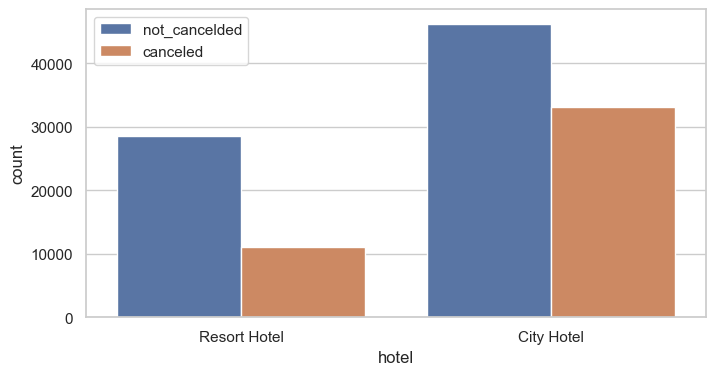

In [69]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.legend(['not_cancelded','canceled'])
plt.show()

- *City hotels exhibit a higher volume of bookings, resulting in a proportional increase in both canceled and non-canceled reservations. This surge in bookings contributes to the elevated numbers of both successful stays and cancellations, showcasing the dynamic nature of City hotel reservations. The significant booking volume underscores the importance of carefully examining cancellation patterns within the context of the overall reservation landscape.*

In [70]:
resort_hotel=df[df['hotel']=='Resort Hotel'] 
city_hotel=df[df['hotel']=='City Hotel']

In [71]:
print('Resort Hotel')
print(resort_hotel['is_canceled'].value_counts(normalize=True))
print('###'*10)
print('City Hotel')
print(city_hotel['is_canceled'].value_counts(normalize=True))

Resort Hotel
is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64
##############################
City Hotel
is_canceled
0    0.582911
1    0.417089
Name: proportion, dtype: float64


In [72]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()
#This part groups the 'resort_hotel' DataFrame by the 'reservation_status_date' column. 
#It essentially groups the data based on unique dates

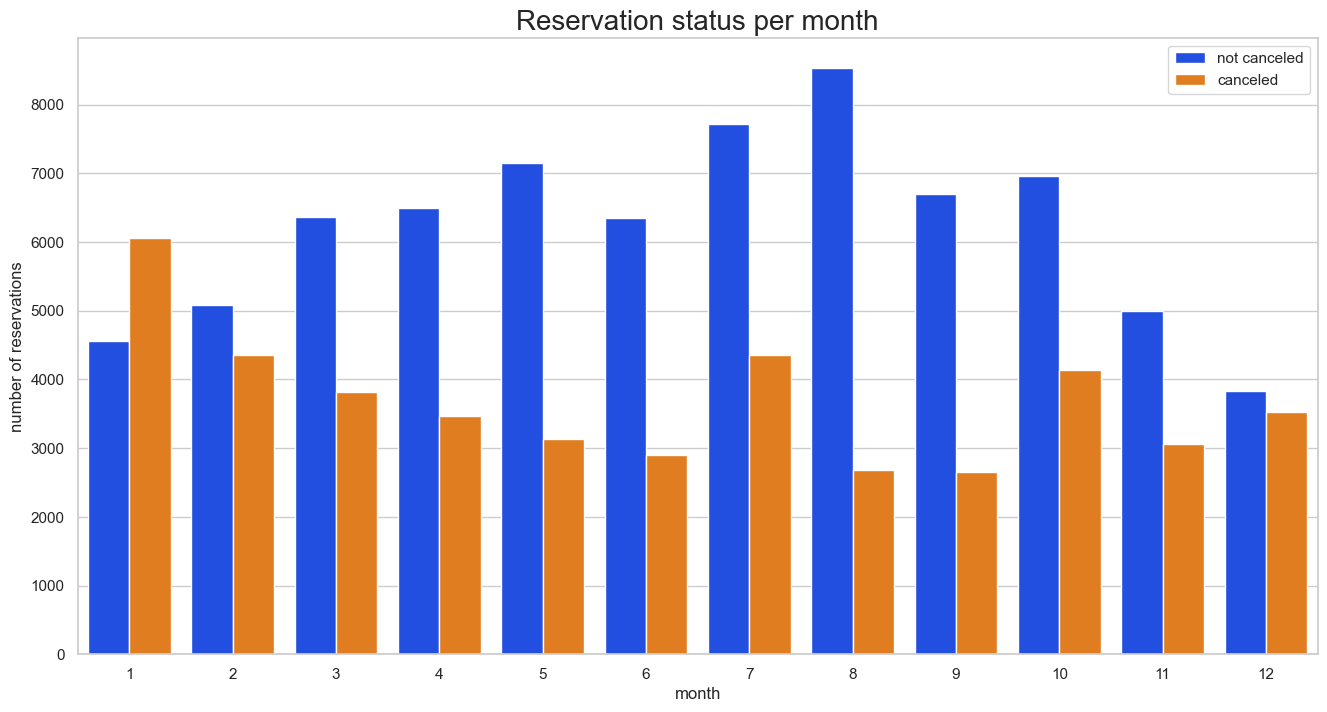

In [77]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax=sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
legend_labels,_=ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()



- *The data reveals distinct patterns in reservation outcomes across various months. In January, there is a notable prevalence of cancellations, accompanied by a lower frequency of non-cancellations. Conversely, August exhibits a contrasting trend, with a lower incidence of cancellations and a higher prevalence of successful stays. December, in comparison, shows a relatively muted disparity between cancellations and non-cancellations, suggesting a more balanced distribution of reservation outcomes. These nuanced variations underscore the seasonal dynamics and highlight the importance of considering temporal factors when analyzing cancellation patterns.*

<Axes: xlabel='month', ylabel='adr'>

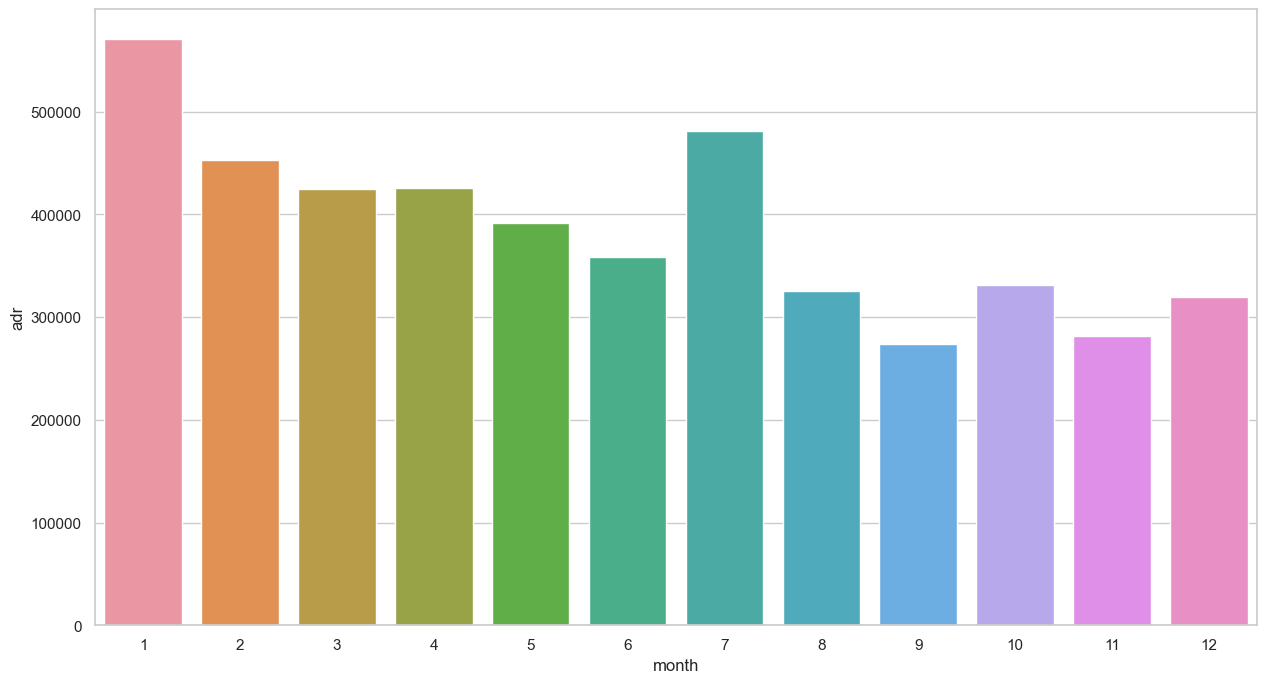

In [83]:
plt.figure(figsize=(15,8))

sns.barplot(x='month',y='adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())

- AS we can see that 

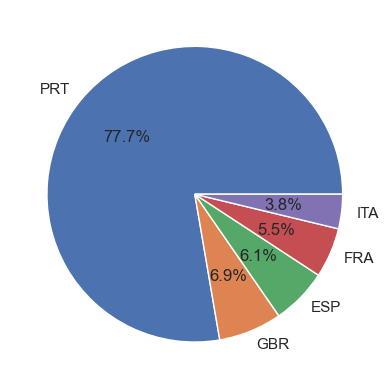

In [92]:
cancel_df=df[df['is_canceled']==1]
top_10=cancel_df['country'].value_counts()[:5]

plt.pie(top_10,labels=top_10.index,autopct='%1.1f%%')
plt.show()

In [93]:
df['market_segment'].value_counts()


market_segment
Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [94]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [95]:
cancel_df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469685
Groups           0.273979
Offline TA/TO    0.187484
Direct           0.043485
Corporate        0.022150
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

# Conclusion

- **It's evident from the analysis that fluctuations in the average daily rates directly influence cancellation rates, with higher rates correlating to increased cancellations, possibly due to consumer preference for lower prices. This trend is notably pronounced in January, characterized by higher cancellation rates compared to August, where lower average rates lead to fewer cancellations. Furthermore, the data indicates a higher cancellation rate in city hotels compared to resort hotels, despite city hotels receiving more bookings. Additionally, a substantial majority of our consumer base, around 77%, hails from Portugal. Most notably, our analysis reveals a consumer inclination toward booking hotels through online travel agents rather than offline counterparts.**


# Suggestion


Certainly! Here are some suggestions to address the high cancellation rate:

1. **Flexible Cancellation Policies:** Consider offering more flexible cancellation policies to incentivize guests to complete bookings, especially during high cancellation periods like January.

2. **Dynamic Pricing Strategies:** Adjust pricing strategies based on demand, seasonality, and historical cancellation trends. Offering competitive rates during high cancellation periods might encourage guests to retain their bookings.

3. **Personalized Communication:** Engage guests with personalized communication, reminding them of their upcoming reservations and highlighting the benefits of their stay to reduce last-minute cancellations.

4. **Incentives for Non-Cancellation:** Offer perks or discounts for guests who maintain their reservations without cancellation, providing an added incentive for commitment.

5. **Enhanced Booking Experience:** Simplify the booking process and ensure transparent, clear information regarding cancellation policies, aiding guests in making informed decisions.

6. **Data-Driven Insights:** Continuously analyze data to identify patterns in cancellations, allowing for targeted strategies and adjustments to reduce future cancellations effectively.

Implementing these strategies in conjunction with a deeper understanding of guest behavior can help mitigate high cancellation rates and improve overall revenue for the hotels.